# Arviz - Examples

In [1]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ArviZ ships with style sheets!
# https://python.arviz.org/en/stable/examples/styles.html#example-styles
az.style.use("arviz-darkgrid")

In [3]:
y = np.random.normal(0, 1, 1000)

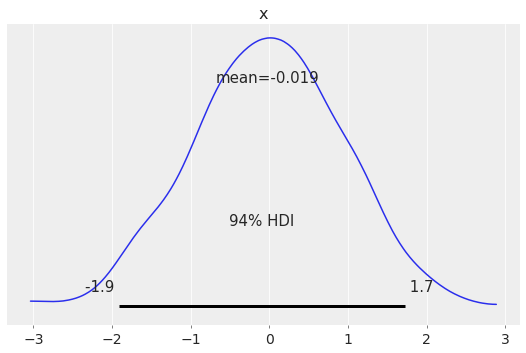

In [4]:
outcome = az.plot_posterior(y)
plt.show()

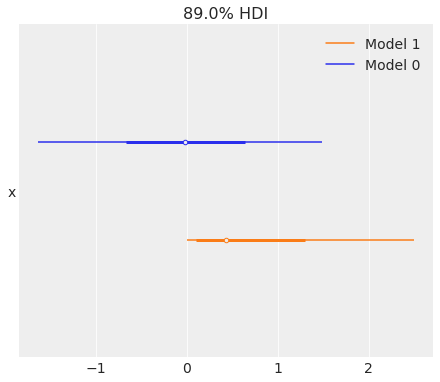

In [5]:
# rcParams -runtime configuration Params - configuração de tempo de execução
az.rcParams['stats.hdi_prob'] = 0.89
az.plot_forest((y, y**2))
plt.show()

## Plotting with PyStan objects

In [6]:
import nest_asyncio
nest_asyncio.apply()

In [7]:
import stan  # pystan version 3.6.0

In [8]:
schools_code = """
data {
  int<lower=0> J;
  array[J] real y;
  array[J] real<lower=0> sigma;
}

parameters {
  real mu;
  real<lower=0> tau;
  array[J] real theta;
}

model {
  // Prioris
  mu ~ normal(0, 5);
  tau ~ cauchy(0, 5);
  theta ~ normal(mu, tau);
  
  // Likelihood
  y ~ normal(theta, sigma);
}
generated quantities {
    vector[J] log_lik;
    vector[J] y_hat;
    
    for (j in 1:J) {
        log_lik[j] = normal_lpdf(y[j] | theta[j], sigma[j]);
        y_hat[j] = normal_rng(theta[j], sigma[j]);
    }
}
"""

schools_dat = {
    "J": 8,
    "y": [28, 8, -3, 7, -1, 1, 18, 12],
    "sigma": [15, 10, 16, 11, 9, 11, 10, 18],
}

schools = np.array(
    [
        "Choate",
        "Deerfield",
        "Phillips Andover",
        "Phillips Exeter",
        "Hotchkiss",
        "Lawrenceville",
        "St. Paul's",
        "Mt. Hermon",
    ])
posterior = stan.build(schools_code, data=schools_dat, random_seed=1)
fit = posterior.sample(num_chains=4, num_samples=1000)

Building: 0.2s


Building: 0.3s


Building: 0.4s


Building: 0.5s


Building: 0.6s


Building: 0.7s


Building: 0.8s


Building: 0.9s


Building: 1.0s


Building: 1.1s


Building: 1.2s


Building: 1.3s


Building: 1.4s


Building: 1.5s


Building: 1.6s


Building: 1.7s


Building: 1.8s


Building: 1.9s


Building: 2.0s


Building: 2.2s


Building: 2.3s


Building: 2.4s


Building: 2.5s


Building: 2.6s


Building: 2.7s


Building: 2.8s


Building: 2.9s


Building: 3.0s


Building: 3.1s


Building: 3.2s


Building: 3.3s


Building: 3.4s


Building: 3.5s


Building: 3.6s


Building: 3.7s


Building: 3.8s


Building: 3.9s


Building: 4.0s


Building: 4.1s


Building: 4.2s


Building: 4.3s


Building: 4.4s


Building: 4.5s


Building: 4.6s


Building: 4.7s


Building: 4.8s


Building: 4.9s


Building: 5.0s


Building: 5.1s


Building: 5.2s


Building: 5.3s


Building: 5.5s


Building: 5.6s


Building: 5.7s


Building: 5.8s


Building: 5.9s


Building: 6.0s


Building: 6.1s


Building: 6.2s


Building: 6.3s


Building: 6.4s


Building: 6.5s


Building: 6.6s


Building: 6.7s


Building: 6.8s


Building: 6.9s


Building: 7.0s


Building: 7.1s


Building: 7.2s


Building: 7.3s


Building: 7.4s


Building: 7.5s


Building: 7.6s


Building: 7.7s


Building: 7.8s


Building: 7.9s


Building: 8.0s


Building: 8.1s


Building: 8.2s


Building: 8.3s


Building: 8.4s


Building: 8.5s


Building: 8.6s


Building: 8.7s


Building: 8.8s


Building: 9.0s


Building: 9.1s


Building: 9.2s


Building: 9.3s


Building: 9.4s


Building: 9.5s


Building: 9.6s


Building: 9.7s


Building: 9.8s


Building: 9.9s


Building: 10.0s


Building: 10.1s


Building: 10.2s


Building: 10.3s


Building: 10.4s


Building: 10.5s


Building: 10.6s


Building: 10.7s


Building: 10.8s


Building: 10.9s


Building: 11.0s


Building: 11.1s


Building: 11.2s


Building: 11.3s


Building: 11.4s


Building: 11.5s


Building: 11.6s


Building: 11.7s


Building: 11.8s


Building: 11.9s


Building: 12.0s


Building: 12.1s


Building: 12.2s


Building: 12.3s


Building: 12.4s


Building: 12.6s


Building: 12.7s


/home/rodolpho/.cache/httpstan/4.10.1/models/2367d4vd/model_2367d4vd.cpp: In constructor ‘model_2367d4vd_namespace::model_2367d4vd::model_2367d4vd(stan::io::var_context&, unsigned int, std::ostream*)’:
/home/rodolpho/.cache/httpstan/4.10.1/models/2367d4vd/model_2367d4vd.cpp:54:11: warning: variable ‘pos__’ set but not used [-Wunused-but-set-variable]
   54 |       int pos__ = std::numeric_limits<int>::min();
      |           ^~~~~


Building: 12.8s


Building: 12.9s


In file included from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim/fun.hpp:124,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev/fun.hpp:55,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev.hpp:10,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math.hpp:19,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/rodolpho/.cache/httpstan/4.10.1/m

Building: 13.0s


Building: 13.1s


Building: 13.2s


Building: 13.3s


Building: 13.4s


Building: 13.5s


/home/rodolpho/.cache/httpstan/4.10.1/models/2367d4vd/model_2367d4vd.cpp: In instantiation of ‘void model_2367d4vd_namespace::model_2367d4vd::transform_inits_impl(const stan::io::var_context&, VecVar&, std::ostream*) const [with VecVar = std::vector<double, std::allocator<double> >; stan::require_vector_t<T_y>* <anonymous> = 0; std::ostream = std::basic_ostream<char>]’:
/home/rodolpho/.cache/httpstan/4.10.1/models/2367d4vd/model_2367d4vd.cpp:440:50:   required from here
/home/rodolpho/.cache/httpstan/4.10.1/models/2367d4vd/model_2367d4vd.cpp:284:11: warning: variable ‘pos__’ set but not used [-Wunused-but-set-variable]
  284 |       int pos__ = std::numeric_limits<int>::min();
      |           ^~~~~
/home/rodolpho/.cache/httpstan/4.10.1/models/2367d4vd/model_2367d4vd.cpp: In instantiation of ‘void model_2367d4vd_namespace::model_2367d4vd::unconstrain_array_impl(const VecVar&, const VecI&, VecVar&, std::ostream*) const [with VecVar = std::vector<double, std::allocator<double> >; VecI =

Building: 13.6s


Building: 13.7s


Building: 13.8s


/home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp: In instantiation of ‘TupleT stan::math::internal::grad_2F1_impl_ab(const T1&, const T2&, const T3&, const T_z&, double, int) [with bool calc_a1 = true; bool calc_a2 = true; bool calc_b1 = true; T1 = stan::math::var_value<double>; T2 = stan::math::var_value<double>; T3 = stan::math::var_value<double>; T_z = stan::math::var_value<double>; ScalarT = stan::math::var_value<double>; TupleT = std::tuple<stan::math::var_value<double, void>, stan::math::var_value<double, void>, stan::math::var_value<double, void> >]’:
/home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:205:78:   required from ‘TupleT stan::math::internal::grad_2F1_impl(const T1&, const T2&, const T3&, const T_z&, double, int) [with bool calc_a1 = true; bool calc_a2 = true; bool calc_b1 = true; bool calc_z = true; T1 = stan::math::var_value<double>; T

Building: 13.9s


Building: 14.0s


Building: 14.1s


Building: 14.2s


Building: 14.3s


Building: 14.4s


Building: 14.5s


Building: 14.6s


Building: 14.7s


Building: 14.8s


Building: 14.9s


Building: 15.0s


Building: 15.1s


Building: 15.2s


Building: 15.3s


Building: 15.4s


Building: 15.5s


Building: 15.6s


Building: 15.7s


Building: 15.8s


Building: 15.9s


Building: 16.1s


Building: 16.2s


Building: 16.3s


Building: 16.4s


Building: 16.5s


Building: 16.6s


Building: 16.7s


Building: 16.8s


Building: 16.9s


Building: 17.0s


Building: 17.1s


Building: 17.2s


Building: 17.3s


Building: 17.4s


Building: 17.5s


Building: 17.6s


Building: 17.7s


Building: 17.8s


Building: 17.9s


Building: 18.0s


Building: 18.1s


Building: 18.2s


Building: 18.3s


Building: 18.4s


Building: 18.5s


Building: 18.6s


Building: 18.7s


Building: 18.8s


Building: 18.9s


Building: 19.0s


Building: 19.1s


Building: 19.2s


Building: 19.3s


Building: 19.4s


Building: 19.5s


Building: 19.6s


Building: 19.7s


Building: 19.9s


Building: 20.0s


Building: 20.1s


Building: 20.2s


Building: 20.3s


Building: 20.4s


Building: 20.5s


Building: 20.6s


Building: 20.7s


Building: 20.8s


Building: 20.9s


Building: 21.0s


Building: 21.1s


Building: 21.2s


Building: 21.3s


Building: 21.4s


Building: 21.5s


Building: 21.6s


Building: 21.7s


Building: 21.8s


Building: 21.9s


Building: 22.0s


Building: 22.1s


Building: 22.2s


Building: 22.3s


Building: 22.4s


Building: 22.5s


Building: 22.6s


Building: 22.7s


Building: 22.8s


Building: 22.9s


Building: 23.0s


Building: 23.1s


Building: 23.2s


Building: 23.3s


Building: 23.4s


Building: 23.5s


Building: 23.6s


Building: 23.8s


Building: 23.9s


Building: 24.0s


Building: 24.1s


Building: 24.2s


Building: 24.3s


Building: 24.4s


Building: 24.5s


Building: 24.6s


Building: 24.7s


Building: 24.8s


Building: 24.9s


Building: 25.0s


Building: 25.1s


Building: 25.2s


Building: 25.3s


Building: 25.4s


Building: 25.5s


Building: 25.6s


Building: 25.7s


Building: 25.8s


Building: 25.9s


Building: 26.0s


Building: 26.1s


Building: 26.2s


Building: 26.3s


Building: 26.4s


Building: 26.5s


Building: 26.6s


Building: 26.7s


Building: 26.8s


Building: 26.9s


Building: 27.0s


Building: 27.1s


Building: 27.2s


Building: 27.3s


Building: 27.5s


Building: 27.6s


Building: 27.7s


Building: 27.8s


Building: 27.9s


Building: 28.0s


Building: 28.1s


Building: 28.2s


Building: 28.3s


Building: 28.4s


Building: 28.5s


Building: 28.6s


Building: 28.7s


Building: 28.8s


Building: 28.9s


Building: 29.0s


Building: 29.1s


Building: 29.2s


Building: 29.3s


Building: 29.4s


Building: 29.5s


Building: 29.6s


Building: 29.7s


Building: 29.8s


Building: 29.9s


AttributeError: 'NoneType' object has no attribute 'sample'

array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'tau'}>]],
      dtype=object)

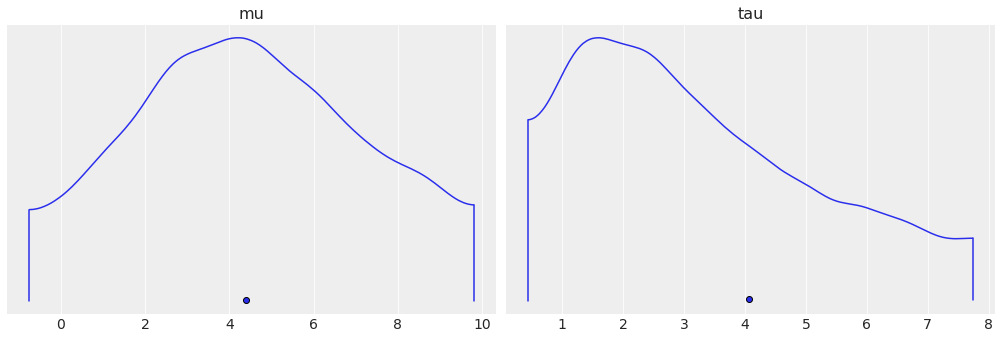

In [14]:
az.plot_density(fit, var_names=["mu", "tau"])

### arviz.from_pystan

https://python.arviz.org/en/stable/api/generated/arviz.from_pystan.html 

```{python3}
arviz.from_pystan(
    posterior=None,             # PyStan fit object for posterior - Samples from posteriori.
    *, 
    posterior_predictive=None,  # Posterior predictive samples for the posterior.
    predictions=None,           # Out-of-sample predictions for the posterior.
    prior=None,                 # PyStan fit object for prior.
    prior_predictive=None,      # Posterior predictive samples for the prior.
    observed_data=None, 
    constant_data=None, 
    predictions_constant_data=None, 
    log_likelihood=None, 
    coords=None, 
    dims=None, 
    posterior_model=None, 
    prior_model=None, 
    save_warmup=None, 
    dtypes=None
)
```

In [20]:
data = az.from_pystan(
    posterior=fit,
    posterior_predictive="y_hat",
    observed_data=["y"],
    log_likelihood={"y": "log_lik"},
    coords={"school": schools},
    dims={
        "theta": ["school"],
        "y": ["school"],
        "log_lik": ["school"],
        "y_hat": ["school"],
        "theta_tilde": ["school"],
    },
)
data

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats

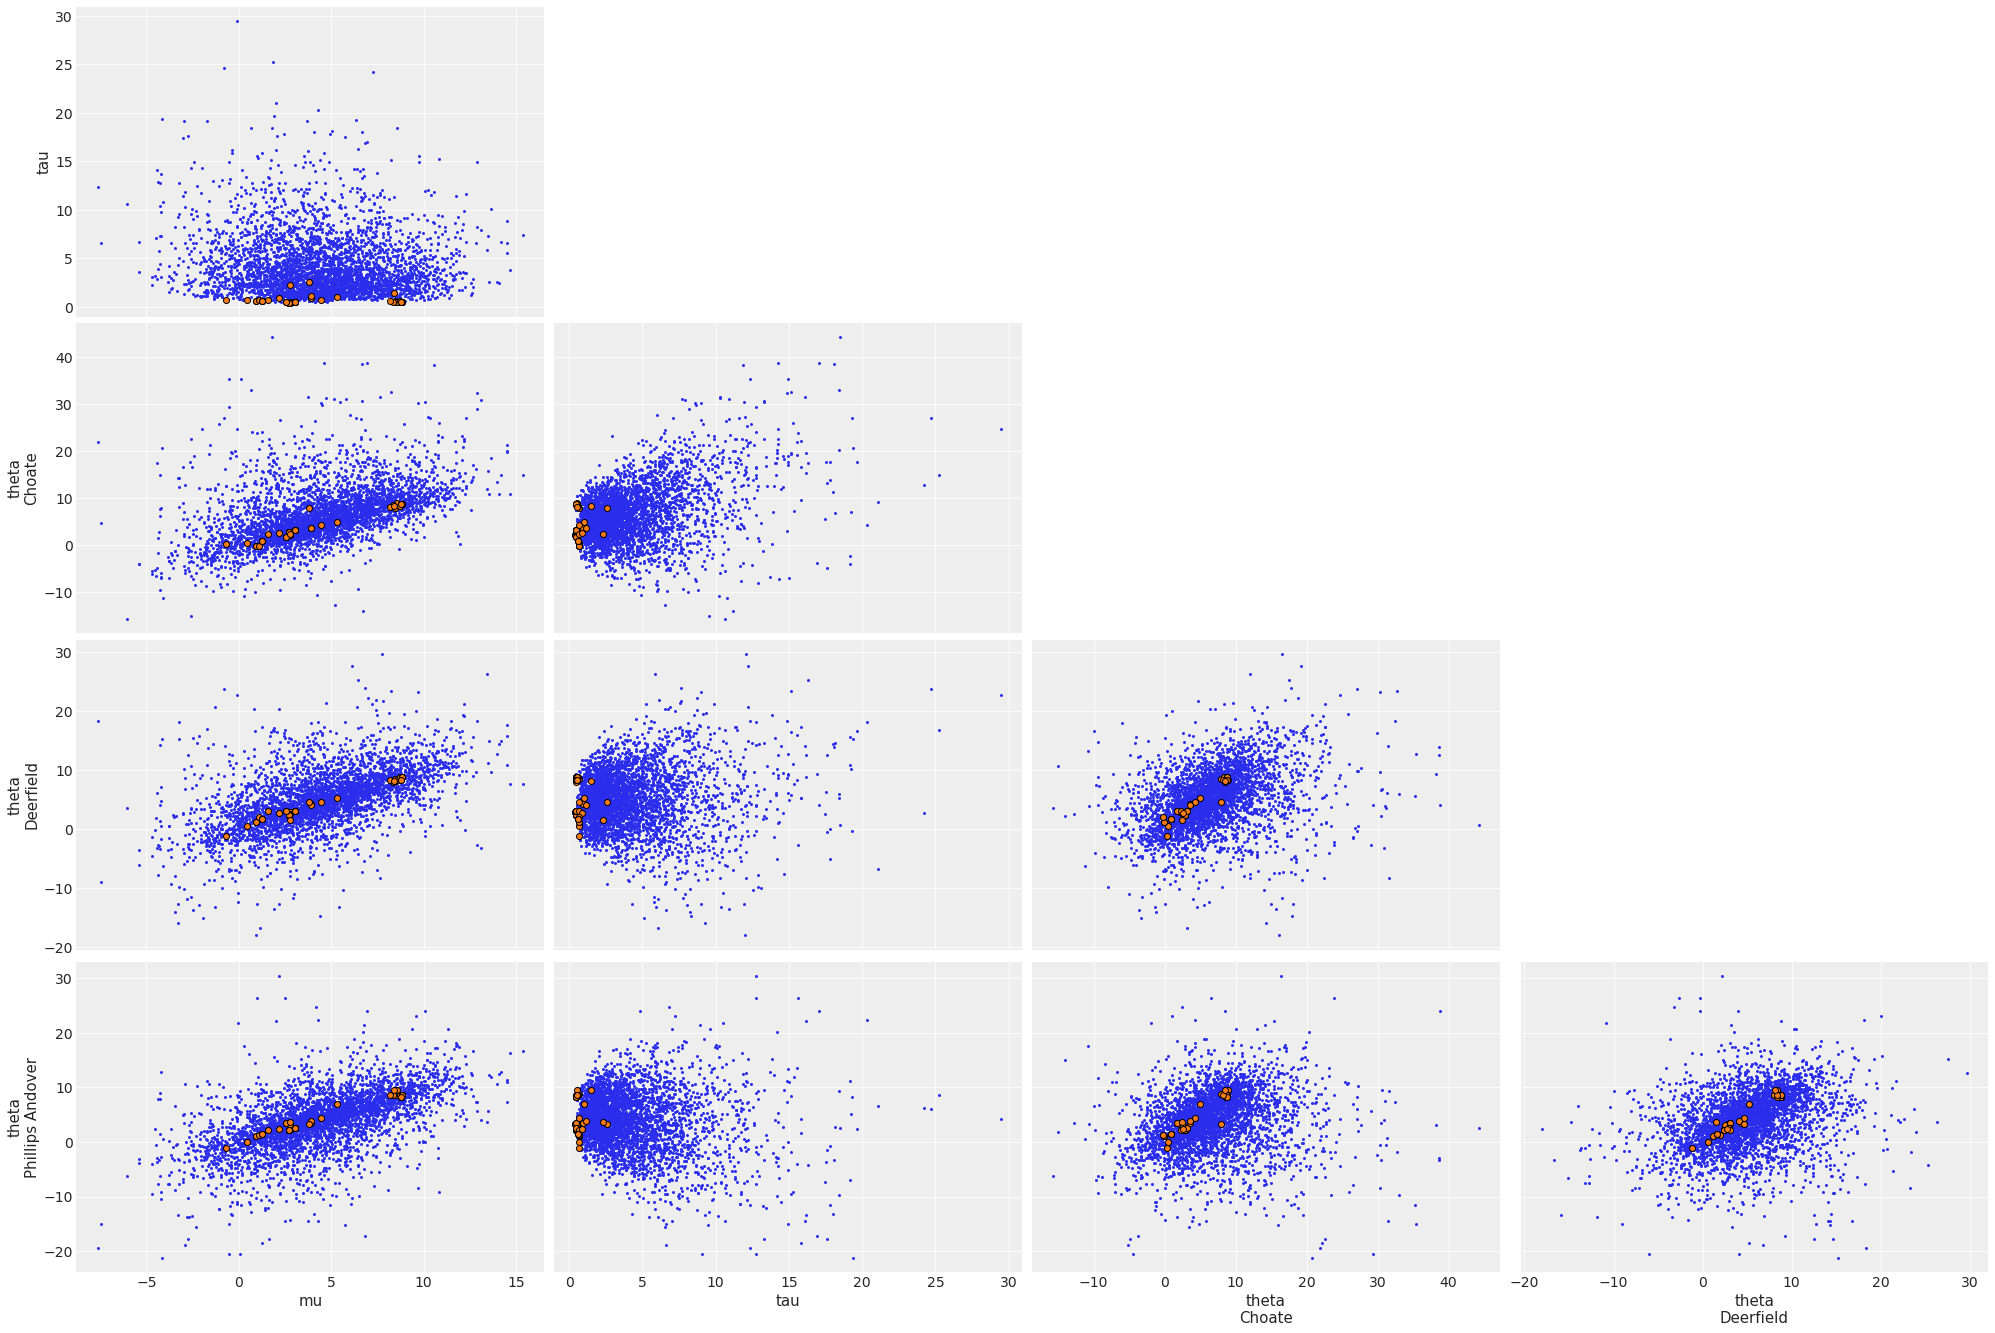

In [21]:
az.plot_pair(
    data,
    coords={"school": ["Choate", "Deerfield", "Phillips Andover"]},
    divergences=True,
);

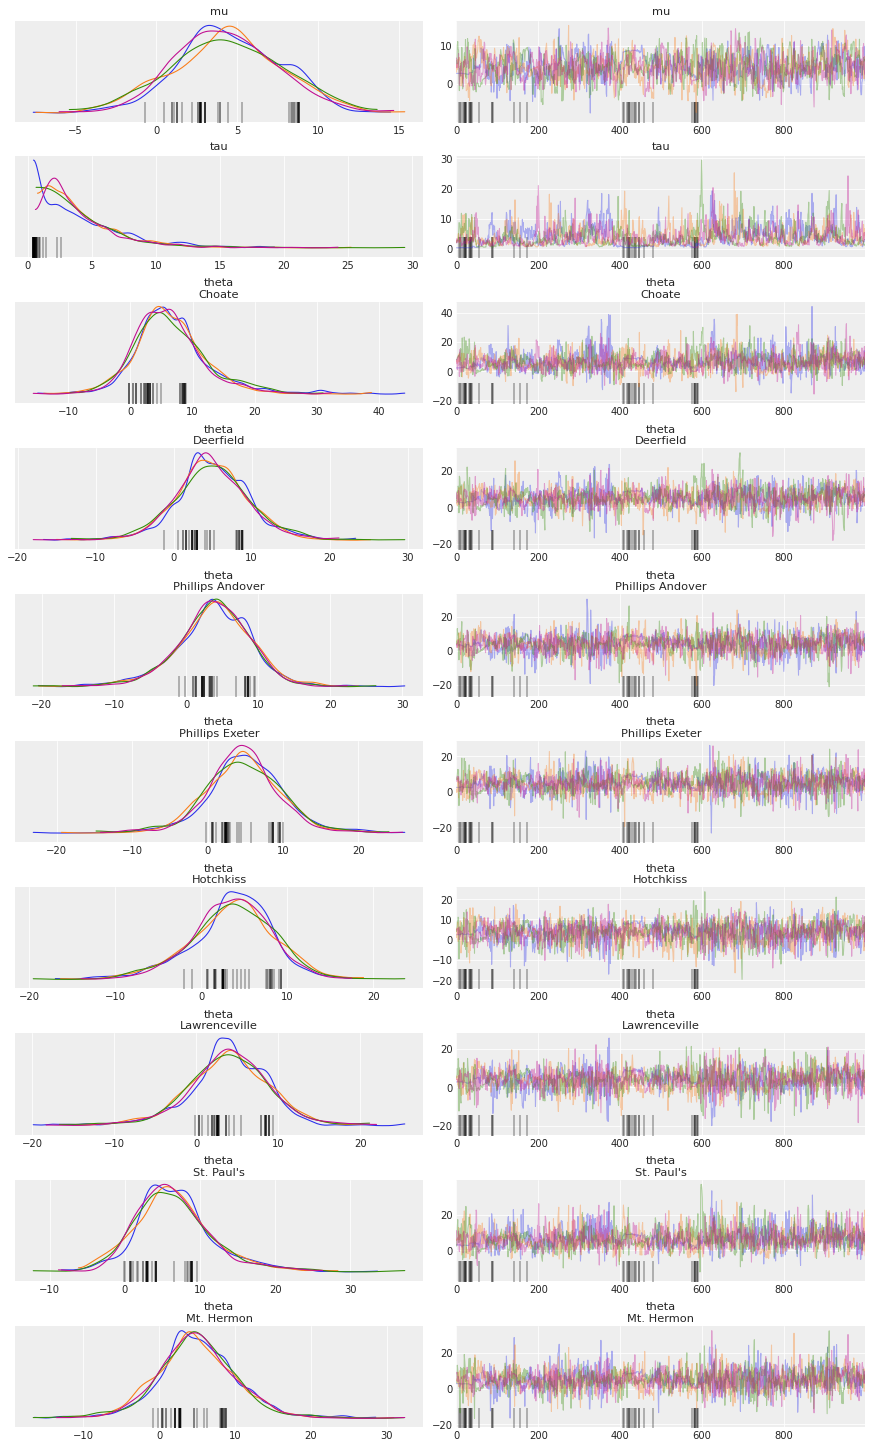

In [22]:
az.plot_trace(data, compact=False)
plt.show()

## Meu Exemplo Simples 1

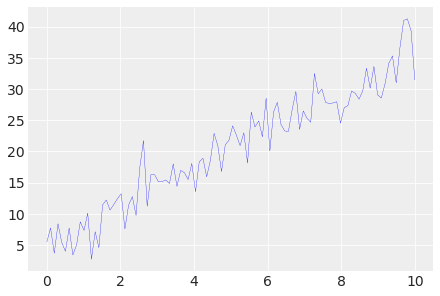

In [84]:
N = 100
alpha = 5
beta = 3

x = np.linspace(0, 10, N)
y = np.array([alpha + beta * x_i + np.random.normal(0, 3, 1) for x_i in x]).flatten()

plt.plot(x, y, lw=0.3, c='blue')

plt.show()

In [85]:
model = """
    data{
        int N;
        vector[N] x;
        vector[N] y;
    }
    
    parameters {
        real alpha;
        real beta;
        real<lower=0> sigma;
    }
    
    transformed parameters {
        vector[N] mu;
        
          mu = alpha + beta * x;
    }
    
    model {
        //Prioris
        alpha ~ normal(0, 4);
        beta ~ normal(0, 2);
        sigma ~ lognormal(0, 1);

      
        // Likelihood
        y ~ normal(mu, sigma);
    }
    
    generated quantities {
        vector[N] log_lik;
        vector[N] y_hat;
        
        for (i in 1:N){
            log_lik[i] = normal_lpdf(y[i] | mu[i], sigma);
            y_hat[i] = normal_rng(mu[i], sigma);
        }
        
    }
"""

data = {
    'N': N,
    'x': x,
    'y': y,
}

posteriori = stan.build(model, data=data)
samples = posteriori.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 8e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.
  Adjust your expectations accordingly!


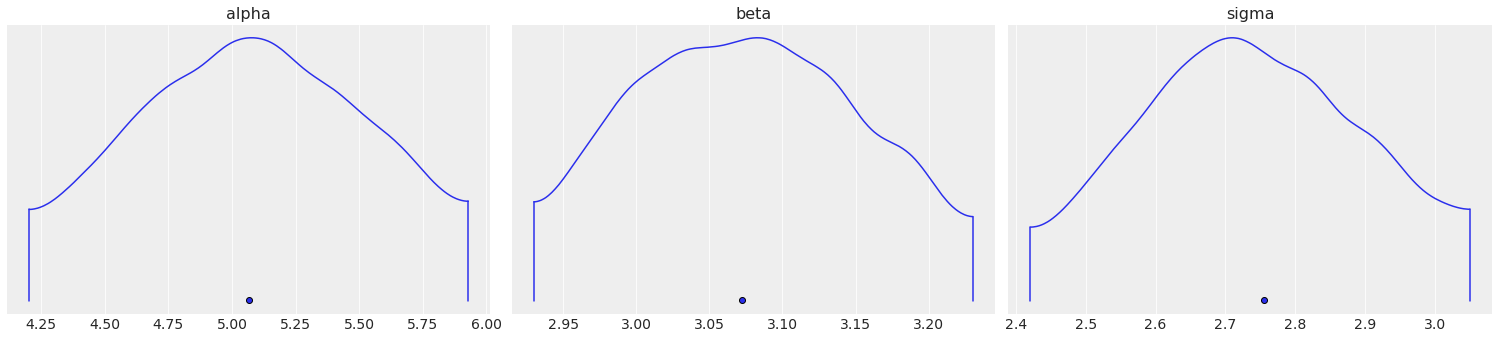

In [86]:
az.plot_density(samples, var_names=['alpha', 'beta', 'sigma'])
plt.show()

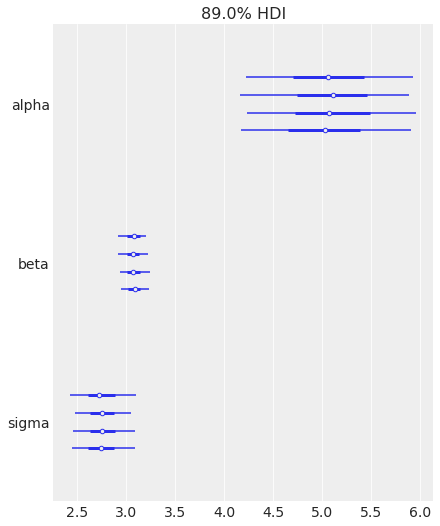

In [87]:
az.plot_forest(samples, var_names=["alpha", "beta", "sigma"])
plt.show()

In [90]:
data = az.from_pystan(
    posterior=samples,
    posterior_predictive="y_hat",
    observed_data=data,
    log_likelihood={"y": "log_lik"},
)

data

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats

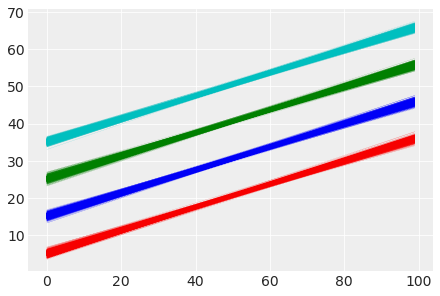

In [91]:
# Posteriori
col=['r', 'b', 'g', 'c']

for j in range(4):
    for i in range(1000):
        plt.plot(data.posterior.mu.values[j][i] + 10*j, c=col[j], lw=0.1)
plt.show()

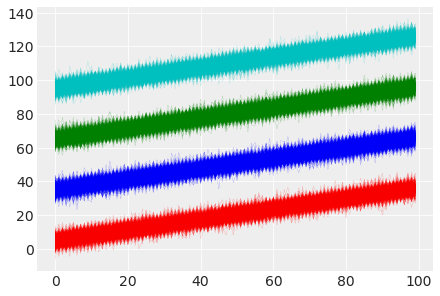

In [92]:
# Posteriori predictive

col=['r', 'b', 'g', 'c']

for j in range(4):
    for i in range(1000):
        plt.plot(data.posterior_predictive.y_hat[j][i] + 30*j, c=col[j], lw=0.1)
plt.show()

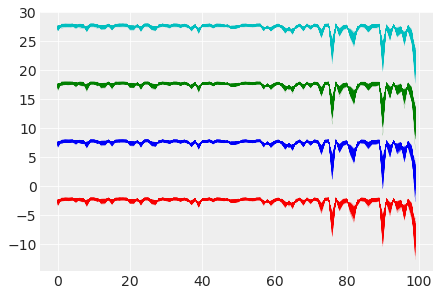

In [219]:
# Log-Likelihood

col=['r', 'b', 'g', 'c']

for j in range(4):
    for i in range(1000):
        plt.plot(data.log_likelihood.y[j][i] + 10*j, c=col[j], lw=0.1)
plt.show()



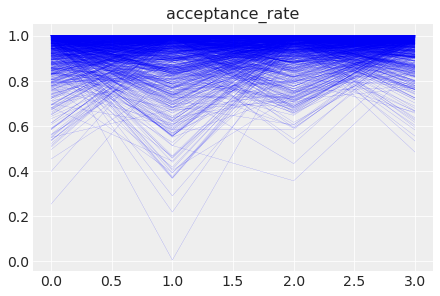

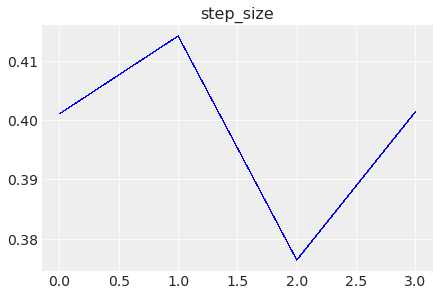

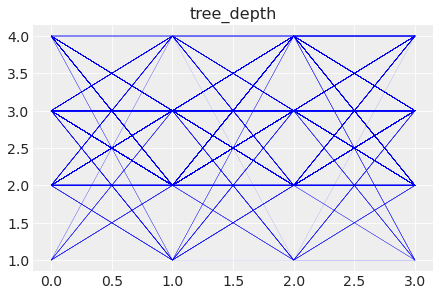

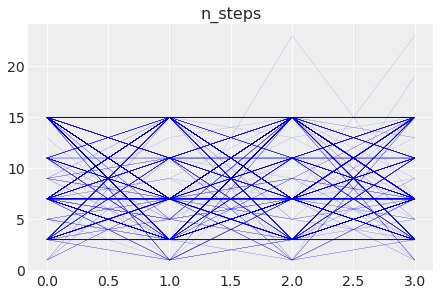

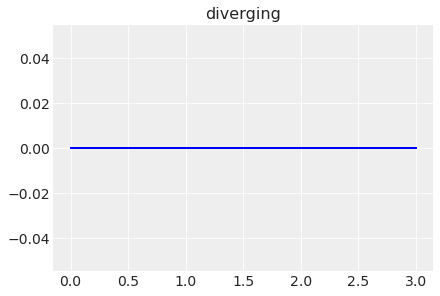

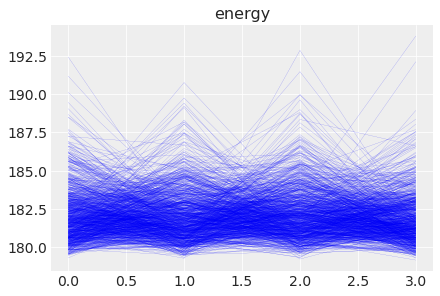

In [237]:
var_stats = [
    'acceptance_rate',
    'step_size',
    'tree_depth',
    'n_steps',
    'diverging',
    'energy'
]

for i in range(len(var_stats)):
    plt.plot(data.sample_stats[var_stats[i]], c='b', lw=0.1)
    plt.title(var_stats[i])
    plt.show()

#### Trabalhando com InferenceData

In [143]:
posterior = data.posterior
posterior

<xarray.Dataset>
Dimensions:   (chain: 4, draw: 1000, mu_dim_0: 100)
Coordinates:
  * chain     (chain) int64 0 1 2 3
  * draw      (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
  * mu_dim_0  (mu_dim_0) int64 0 1 2 3 4 5 6 7 8 ... 91 92 93 94 95 96 97 98 99
Data variables:
    alpha     (chain, draw) float64 6.93 6.384 7.327 7.802 ... 7.236 6.87 6.73
    beta      (chain, draw) float64 3.162 3.247 3.034 ... 3.121 3.147 3.183
    sigma     (chain, draw) float64 3.21 3.939 3.982 4.139 ... 3.368 3.617 3.655
    mu        (chain, draw, mu_dim_0) float64 6.93 7.25 7.569 ... 38.24 38.56
Attributes:
    created_at:                 2023-02-16T16:21:27.510605
    arviz_version:              0.14.0
    inference_library:          stan
    inference_library_version:  3.6.0
    num_chains:                 4
    num_samples:                1000
    num_thin:                   1
    num_warmup:                 1000
    save_warmup:                0

In [150]:
#observed_data = data.observed_data
#observed_data

In [152]:
data.to_netcdf("example0.nc")

'example0.nc'

## Trabalhando com *InferenceData*

In [93]:
import arviz as az
import numpy as np
import xarray as xr
xr.set_options(display_expand_data=False, display_expand_attrs=False);

In [94]:
idata = az.load_arviz_data("centered_eight")
idata

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

In [95]:
post = idata.posterior

### Adicionando uma nova variável

In [96]:
post['log_tau'] = np.log(post['tau'])
idata.posterior

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 500, school: 8)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 492 493 494 495 496 497 498 499
  * school   (school) object 'Choate' 'Deerfield' ... "St. Paul's" 'Mt. Hermon'
Data variables:
    mu       (chain, draw) float64 ...
    theta    (chain, draw, school) float64 ...
    tau      (chain, draw) float64 4.726 3.909 4.844 1.857 ... 2.741 2.932 4.461
    log_tau  (chain, draw) float64 1.553 1.363 1.578 ... 1.008 1.076 1.495
Attributes: (6)

### Combine as cadeias (chains) e amostras (draws) 

In [97]:
stacked = az.extract(idata)
stacked

<xarray.Dataset>
Dimensions:  (sample: 2000, school: 8)
Coordinates:
  * school   (school) object 'Choate' 'Deerfield' ... "St. Paul's" 'Mt. Hermon'
  * sample   (sample) object MultiIndex
  * chain    (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 3 3 3 3
  * draw     (sample) int64 0 1 2 3 4 5 6 7 ... 492 493 494 495 496 497 498 499
Data variables:
    mu       (sample) float64 7.872 3.385 9.1 7.304 ... 1.859 1.767 3.486 3.404
    theta    (school, sample) float64 12.32 11.29 5.709 ... -2.623 8.452 1.295
    tau      (sample) float64 4.726 3.909 4.844 1.857 ... 2.741 2.932 4.461
    log_tau  (sample) float64 1.553 1.363 1.578 0.6188 ... 1.008 1.076 1.495
Attributes: (6)

### Obtendo um subconjunto aleatório de amostras

In [98]:
az.extract(idata, num_samples=100)

# To set seed

# az.extract(idata, num_samples=100, rng=3) 
# az.extract(idata, group="log_likelihood", num_samples=100, rng=3)

<xarray.Dataset>
Dimensions:  (sample: 100, school: 8)
Coordinates:
  * school   (school) object 'Choate' 'Deerfield' ... "St. Paul's" 'Mt. Hermon'
  * sample   (sample) object MultiIndex
  * chain    (sample) int64 2 0 0 2 2 0 3 1 1 2 1 2 ... 0 2 2 0 1 3 3 3 0 0 0 2
  * draw     (sample) int64 80 415 131 327 356 94 ... 438 289 126 438 279 213
Data variables:
    mu       (sample) float64 0.1698 7.208 6.205 1.471 ... 3.105 3.699 -0.455
    theta    (school, sample) float64 3.016 16.78 6.035 ... -1.62 4.491 6.136
    tau      (sample) float64 1.93 3.099 2.362 2.124 ... 2.216 3.228 2.405 4.897
    log_tau  (sample) float64 0.6576 1.131 0.8595 0.7535 ... 1.172 0.8775 1.589
Attributes: (6)

### Obtendo um array Numpy de um parâmetro

In [99]:
stacked

<xarray.Dataset>
Dimensions:  (sample: 2000, school: 8)
Coordinates:
  * school   (school) object 'Choate' 'Deerfield' ... "St. Paul's" 'Mt. Hermon'
  * sample   (sample) object MultiIndex
  * chain    (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 3 3 3 3
  * draw     (sample) int64 0 1 2 3 4 5 6 7 ... 492 493 494 495 496 497 498 499
Data variables:
    mu       (sample) float64 7.872 3.385 9.1 7.304 ... 1.859 1.767 3.486 3.404
    theta    (school, sample) float64 12.32 11.29 5.709 ... -2.623 8.452 1.295
    tau      (sample) float64 4.726 3.909 4.844 1.857 ... 2.741 2.932 4.461
    log_tau  (sample) float64 1.553 1.363 1.578 0.6188 ... 1.008 1.076 1.495
Attributes: (6)

In [100]:
stacked.mu

<xarray.DataArray 'mu' (sample: 2000)>
7.872 3.385 9.1 7.304 9.88 7.042 10.38 ... -4.687 1.543 1.859 1.767 3.486 3.404
Coordinates:
  * sample   (sample) object MultiIndex
  * chain    (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 3 3 3 3
  * draw     (sample) int64 0 1 2 3 4 5 6 7 ... 492 493 494 495 496 497 498 499

In [101]:
stacked.mu.values  # Array numpy

array([7.87179637, 3.38455431, 9.10047569, ..., 1.76673325, 3.48611194,
       3.40446391])

### Obtendo o tamanho das dimensões

In [102]:
len(idata.observed_data.school)

8

### Obtendo os valores das coordenadas

In [176]:
idata.observed_data.school

<xarray.DataArray 'school' (school: 8)>
'Choate' 'Deerfield' 'Phillips Andover' ... "St. Paul's" 'Mt. Hermon'
Coordinates:
  * school   (school) object 'Choate' 'Deerfield' ... "St. Paul's" 'Mt. Hermon'

### Obtendo um subconjunto das cadeias (chains)

In [103]:
idata.sel(chain=[0, 2])

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

### Removendo as primeiras n amostras (burn-in)

In [104]:
# Removendo as primeiras 100 amostras de todos os grupos
idata.sel(draw=slice(100, None))

# Aqui será removido as primeiras 100 amostras apenas do grupo selecionado
# idata.sel(draw=slice(100, None), groups="posterior")

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

### Calculando a média dos valores das cadeias e das amostras

In [183]:
# Calculando a média de todas as dimensões da posteriori
idata.posterior.mean()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    mu       float64 4.486
    theta    float64 4.912
    tau      float64 4.124
    log_tau  float64 1.173

In [184]:
# Calculandoa média apenas das dimensões 'chain' e 'draw'
idata.posterior.mean(dim=['chain', 'draw'])

<xarray.Dataset>
Dimensions:  (school: 8)
Coordinates:
  * school   (school) object 'Choate' 'Deerfield' ... "St. Paul's" 'Mt. Hermon'
Data variables:
    mu       float64 4.486
    theta    (school) float64 6.46 5.028 3.938 4.872 3.667 3.975 6.581 4.772
    tau      float64 4.124
    log_tau  float64 1.173

### Calculando e armazenando a posteriori "pushforward" das quantidades

In [188]:
# Média móvel do log_tau de 50 posições
post["mlogtau"] = post["log_tau"].rolling({'draw': 50}).mean()
post

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 500, school: 8)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 492 493 494 495 496 497 498 499
  * school   (school) object 'Choate' 'Deerfield' ... "St. Paul's" 'Mt. Hermon'
Data variables:
    mu       (chain, draw) float64 7.872 3.385 9.1 7.304 ... 1.767 3.486 3.404
    theta    (chain, draw, school) float64 12.32 9.905 14.95 ... 6.762 1.295
    tau      (chain, draw) float64 4.726 3.909 4.844 1.857 ... 2.741 2.932 4.461
    log_tau  (chain, draw) float64 1.553 1.363 1.578 ... 1.008 1.076 1.495
    mlogtau  (chain, draw) float64 nan nan nan nan ... 1.492 1.494 1.496 1.511
Attributes: (6)